In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [9]:

mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # D

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [40]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screenQQQQ
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [41]:
draw_landmarks(frame, results)

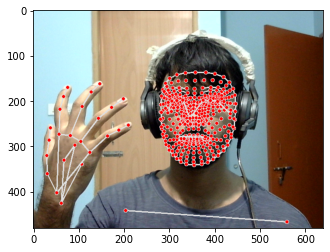

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [18]:
results.pose_landmarks

landmark {
  x: 0.65089375
  y: 0.78314203
  z: -1.9344975
  visibility: 0.9995128
}
landmark {
  x: 0.69205374
  y: 0.6674082
  z: -1.9004043
  visibility: 0.9993882
}
landmark {
  x: 0.7260061
  y: 0.66749835
  z: -1.9001133
  visibility: 0.9993336
}
landmark {
  x: 0.7597915
  y: 0.66424155
  z: -1.9001255
  visibility: 0.999219
}
landmark {
  x: 0.6094501
  y: 0.6609859
  z: -1.8340786
  visibility: 0.9995127
}
landmark {
  x: 0.58546716
  y: 0.6580206
  z: -1.8340628
  visibility: 0.9994712
}
landmark {
  x: 0.56119597
  y: 0.6582405
  z: -1.8340533
  visibility: 0.9994391
}
landmark {
  x: 0.82585096
  y: 0.67554843
  z: -1.3574233
  visibility: 0.9990879
}
landmark {
  x: 0.54743063
  y: 0.6727603
  z: -1.030416
  visibility: 0.9995908
}
landmark {
  x: 0.7247941
  y: 0.88830966
  z: -1.6797371
  visibility: 0.99590075
}
landmark {
  x: 0.6246507
  y: 0.8808687
  z: -1.5969163
  visibility: 0.99730545
}
landmark {
  x: 0.9191308
  y: 1.0136017
  z: -1.0782962
  visibility: 0.624

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
len(results.face_landmarks.landmark)*3

1404

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(1404)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.65089375,  0.78314203, -1.93449748, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
np.save('0',result_test)

In [27]:
np.load('0.npy')

array([ 0.65089375,  0.78314203, -1.93449748, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'i love you badhon'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [30]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                
                    
    cap.release()
    cv2.destroyAllWindows()

In [31]:
cap.release()
cv2.destroyAllWindows()

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'hello': 0, 'thanks': 1, 'i love you badhon': 2}

In [35]:
sequences, labels = [], []
for action in actions:
   for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [36]:
np.array(sequences).shape

(90, 30, 1662)

In [37]:
x=np.array(sequences)

In [38]:
x.shape

(90, 30, 1662)

In [39]:
y=to_categorical(labels).astype(int)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.05)

In [41]:
ytest.shape

(5, 3)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir=os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
res = [.7, 0.2, 0.1]

In [46]:
actions[np.argmax(res)]

'hello'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(xtrain, ytrain, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 4s 72ms/step - loss: 6.6274 - categorical_accuracy: 0.3882
Epoch 2/200
3/3 [==============================] - 0s 65ms/step - loss: 17.1670 - categorical_accuracy: 0.2706
Epoch 3/200
3/3 [==============================] - 0s 69ms/step - loss: 35.4098 - categorical_accuracy: 0.3765
Epoch 4/200
3/3 [==============================] - 0s 71ms/step - loss: 23.9414 - categorical_accuracy: 0.3882
Epoch 5/200
3/3 [==============================] - 0s 72ms/step - loss: 21.9559 - categorical_accuracy: 0.3176
Epoch 6/200
3/3 [==============================] - 0s 65ms/step - loss: 46.9659 - categorical_accuracy: 0.3529
Epoch 7/200
3/3 [==============================] - 0s 67ms/step - loss: 60.1581 - categorical_accuracy: 0.2824
Epoch 8/200
3/3 [==============================] - 0s 58ms/step - loss: 45.0080 - categorical_accuracy: 0.2471
Epoch 9/200
3/3 [==============================] - 0s 65ms/step - loss: 31.9701 - categorical_accuracy: 0.2824
Ep

3/3 [==============================] - 0s 65ms/step - loss: 1.0349 - categorical_accuracy: 0.4235
Epoch 148/200
3/3 [==============================] - 0s 58ms/step - loss: 1.0948 - categorical_accuracy: 0.3882
Epoch 149/200
3/3 [==============================] - 0s 57ms/step - loss: 1.0487 - categorical_accuracy: 0.4941
Epoch 150/200
3/3 [==============================] - 0s 57ms/step - loss: 1.0410 - categorical_accuracy: 0.3882
Epoch 151/200
3/3 [==============================] - 0s 60ms/step - loss: 1.0965 - categorical_accuracy: 0.4000
Epoch 152/200
3/3 [==============================] - 0s 62ms/step - loss: 0.9974 - categorical_accuracy: 0.6118
Epoch 153/200
3/3 [==============================] - 0s 58ms/step - loss: 1.0434 - categorical_accuracy: 0.3765
Epoch 154/200
3/3 [==============================] - 0s 58ms/step - loss: 1.0605 - categorical_accuracy: 0.5176
Epoch 155/200
3/3 [==============================] - 0s 60ms/step - loss: 1.0250 - categorical_accuracy: 0.5529
Epoch 

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [50]:
res = model.predict(xtest)

1/1 [==============================] - 1s 516ms/step


In [51]:
actions[np.argmax(res[4])]

'i love you badhon'

In [52]:
actions[np.argmax(ytest[4])]

'hello'

In [53]:
model.save('action.h5')

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(xtest)

1/1 [==============================] - 0s 19ms/step


In [56]:
ytrue = np.argmax(ytest, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [3, 0]],

       [[4, 1],
        [0, 0]],

       [[0, 3],
        [1, 1]]], dtype=int64)

In [58]:
accuracy_score(ytrue, yhat)

0.2

In [59]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined

In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [218]:
res[np.argmax(res)] > threshold

True

In [185]:
model.predict(np.expand_dims(xtest[0], axis=0))

1/1 [==============================] - 0s 16ms/step


array([[9.8670030e-01, 1.3298781e-02, 9.4959273e-07]], dtype=float32)

In [220]:
!pip install gTTS 

In [221]:
!pip install playsound  

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=eca9d91f83bd327ad3aa4f38bac0cc36ade0f969ae570493249f4f3252666810
  Stored in directory: c:\users\nobel\appdata\local\pip\cache\wheels\ba\39\54\c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound


In [231]:
!pip install pyttsx3  

In [258]:
from gtts import gTTS
  
# This module is imported so that we can 
# play the converted audio
import os
  
# The text that you want to convert to audio
mytext = 'i love you badhon'
  
# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=mytext, lang=language, slow=True)
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("welcome.mp3")
  
# Playing the converted file
os.system("welcome.mp3")

0

In [236]:
from playsound import playsound
playsound('welcome.mp3')


    Error 263 for command:
        open welcome.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close welcome.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: welcome.mp3


PlaysoundException: 
    Error 263 for command:
        open welcome.mp3
    The specified device is not open or is not recognized by MCI.

In [4]:
import pyttsx3
audio=pyttsx3.init()
audio.setProperty('rate',130)
audio.setProperty('volume',.9)
audio.say('Hello Badhon')
audio.say('I love you')
audio.runAndWait()